# Image Classification using Keras and TF -   

In [231]:
import numpy as np 
import pandas as pd 

%matplotlib inline 
import matplotlib as mtp 
import matplotlib.pyplot as plt 

In [232]:
import tensorflow as tf     # pip install tensorflow==<version_name> 
from tensorflow import keras 

In [233]:
tf.__version__

'2.19.0'

In [234]:
keras.__version__ 

'3.10.0'

In [235]:
np.random.seed(42) 
tf.random.set_seed(42) 

# Image dataset loading (available in keras)  

In [236]:
fashion_mnist = keras.datasets.fashion_mnist 
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data() 

In [237]:
print(f"Train size :\n{x_train_full.shape}\n{y_train_full.shape}\nTest size : \n{x_test.shape}\n{y_test.shape}") 

Train size :
(60000, 28, 28)
(60000,)
Test size : 
(10000, 28, 28)
(10000,)


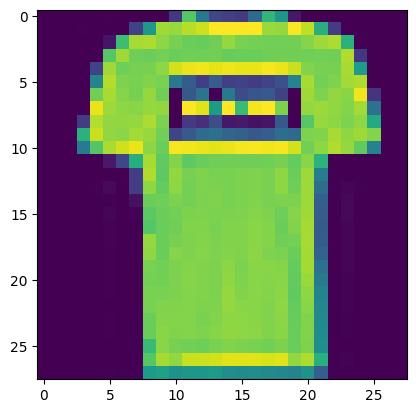

In [238]:
plt.imshow(x_train_full[1])    # sample image out of 60k images 

In [239]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 

In [240]:
class_names[y_train_full[1]] 

'T-shirt/top'

Data Normalization (we normalize the data so that it is approximately the same scale)  

In [241]:
x_train_n = x_train_full / 255.0      # 255 is the final limit in pixel colors 
x_test_n = x_test / 255.0 

Data splitting as train, validation, and test sets  

In [242]:
X_valid, X_train = x_train_n[:5000], x_train_n[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 
X_test = x_test_n 

In [243]:
X_valid 

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [244]:
y_valid 

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

# Neural Network Model (in Keras)  

In [245]:
# Sequential model object 
model = keras.models.Sequential([
    keras.layers.Input(shape=(28,28)),   # Input layer; making the 2D array to a 1D format for input layer 
    keras.layers.Flatten(), 
    keras.layers.Dense(300, activation='relu'),  # Hidden layer 1; with 300 neurons and ReLU activation function  _| 0 for -ve values & |
    keras.layers.Dense(100, activation='relu'),  # Hidden layer 2; with 100 neurons and ReLU activation function   | 1 for +ve values.  |
    keras.layers.Dense(10, activation='softmax')  
    # Output layer; with 10 neurons and softmax activation function for exclusive class classification
])       

##  OR --
# model = keras.models.Sequential() 
# model.add(keras.layers.Flatten(input_shape=[28, 28]))     # Input layer; making the 2D array to a 1D format for input layer 
# model.add(keras.layers.Dense(300, activation='relu'))     # Hidden layer 1; with 300 neurons and ReLU activation function  _| 0 for -ve values & |
# model.add(keras.layers.Dense(100, activation='relu'))     # Hidden layer 2; with 100 neurons and ReLU activation function   | 1 for +ve values.  |
# model.add(keras.layers.Dense(10, activation='softmax'))   # Output layer; with 10 neurons and softmax activation function for exclusive class classification 


model.summary() 

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

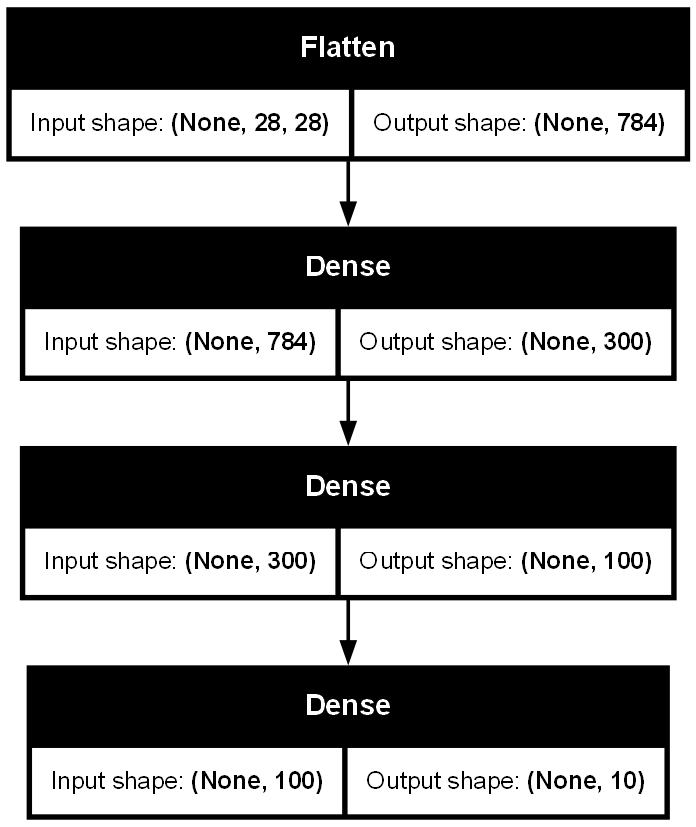

In [ ]:
import pydot 
from IPython.display import Image  

# keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')  
keras.utils.plot_model(model, show_shapes=True, to_file='model.png', dpi=130)   
Image('model.png')  

In [247]:
weight_l1, bais_l1 = model.layers[1].get_weights()   # Weight and bias distribution at different dense layers 
weight_l2, bais_l2 = model.layers[2].get_weights()   # Weight and bias distribution at different dense layers 
weight_l3, bais_l3 = model.layers[3].get_weights()   # Weight and bias distribution at different dense layers 

In [248]:
weight_l1 

array([[-0.03589175, -0.04329207,  0.02851426, ...,  0.04572704,
         0.00485192,  0.0404306 ],
       [ 0.07122386,  0.05626604, -0.0368892 , ..., -0.07109684,
        -0.05465598, -0.01235921],
       [-0.05699002,  0.01322316, -0.03233444, ...,  0.06148982,
         0.03283781,  0.04216205],
       ...,
       [ 0.05393891, -0.06024731, -0.05852662, ..., -0.05055693,
        -0.06224358,  0.04197617],
       [ 0.05986476, -0.03100252,  0.00866494, ...,  0.05763996,
        -0.06263174,  0.06273554],
       [ 0.02024655,  0.06560482, -0.02382325, ...,  0.04049921,
         0.0629794 , -0.04587167]], dtype=float32)

In [249]:
bais_l1 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [250]:
print(f"Weight shape : {weight_l1.shape}\nBias shape : {bais_l1.shape}") 

Weight shape : (784, 300)
Bias shape : (300,)


In [251]:
weight_l2 

array([[ 0.12163364,  0.08588364,  0.07700785, ...,  0.01969383,
         0.0326707 , -0.1135227 ],
       [ 0.11145786, -0.07500391, -0.08926073, ..., -0.08009677,
         0.07926501,  0.08566528],
       [-0.04728264,  0.11038838, -0.06985781, ..., -0.10974054,
         0.07289407,  0.06425791],
       ...,
       [ 0.06870694,  0.11579626,  0.11642543, ...,  0.1198542 ,
        -0.11127776,  0.10187491],
       [ 0.09705638, -0.00384403,  0.05343878, ..., -0.01319011,
         0.05188113, -0.0408332 ],
       [-0.08854631,  0.08571631, -0.10585669, ..., -0.06042019,
        -0.07799666,  0.07882478]], dtype=float32)

In [252]:
bais_l2 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [253]:
print(f"Weight shape : {weight_l2.shape}\nBias shape : {bais_l2.shape}") 

Weight shape : (300, 100)
Bias shape : (100,)


In [254]:
weight_l3 

array([[ 0.1428501 ,  0.1616945 , -0.2173377 , -0.04689887,  0.15280503,
        -0.20516822, -0.15800557,  0.08580029, -0.08538947, -0.19583966],
       [ 0.01075727,  0.22803971,  0.18896502,  0.03931999,  0.13287753,
         0.09870362, -0.13179193, -0.11911301, -0.02409591,  0.01166266],
       [ 0.16471115, -0.08459058,  0.14486778, -0.22410837,  0.04237711,
         0.14595023,  0.14218426,  0.13668036, -0.10344204,  0.1954453 ],
       [-0.16116321,  0.19336617,  0.04177052, -0.1465252 ,  0.15319738,
        -0.03707458,  0.02344522,  0.05282485,  0.19767907, -0.11740316],
       [-0.17447497,  0.16547394, -0.07567269,  0.23072624,  0.10121357,
         0.16314435,  0.21771869,  0.19076157, -0.09993649,  0.22507301],
       [ 0.18109158, -0.00373809, -0.03871588,  0.03422078,  0.15029207,
         0.04997   , -0.21221624,  0.19032624,  0.17381763,  0.15899295],
       [-0.01125027, -0.02228461,  0.23140684,  0.2167365 , -0.16061892,
        -0.13262054,  0.086629  ,  0.2069293 

In [255]:
bais_l3 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [256]:
print(f"Weight shape : {weight_l3.shape}\nBias shape : {bais_l3.shape}") 

Weight shape : (100, 10)
Bias shape : (10,)
